In [4]:
import pandas as pd
import seaborn as sns
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, TensorDataset

In [5]:
trainl = pd.read_csv("mitsui-commodity-prediction-challenge/train_labels.csv")
test_df = pd.read_csv("mitsui-commodity-prediction-challenge/test.csv")
traint = pd.read_csv("mitsui-commodity-prediction-challenge/target_pairs.csv")


In [6]:
trainl = trainl.fillna(0)

In [7]:
target_lag_1 = traint.loc[traint["lag"]==1,"target"].values
target_lag_2 = traint.loc[traint["lag"]==2,"target"].values
target_lag_3 = traint.loc[traint["lag"]==3,"target"].values
target_lag_4 = traint.loc[traint["lag"]==4,"target"].values

In [8]:
Features = [i for i in trainl.columns ]
def creat_lagged_labels(df):
    dt = pd.DataFrame()
    dt["date_id"] = df["date_id"]
    for f in Features[1:]:
        if f in target_lag_1:
            lag = 1
        elif f in target_lag_2:
            lag = 2
        elif f in target_lag_3:
            lag = 3
        elif f in target_lag_4:
            lag = 4    
        dt[f] = df[f].shift(lag).fillna(0)
    return df, dt

In [9]:
_, train_lagged = creat_lagged_labels(trainl)

/tmp/ipykernel_5369/4124565549.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dt[f] = df[f].shift(lag).fillna(0)
/tmp/ipykernel_5369/4124565549.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dt[f] = df[f].shift(lag).fillna(0)
/tmp/ipykernel_5369/4124565549.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

<Axes: >

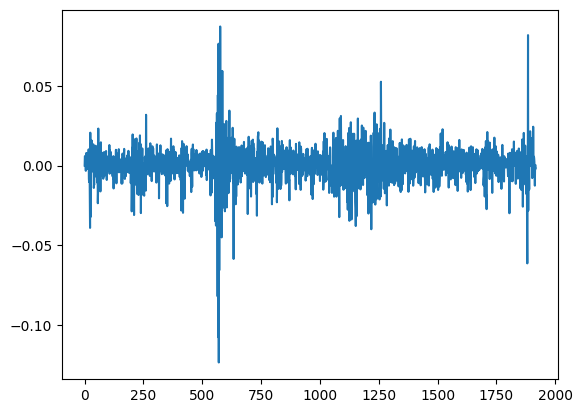

In [10]:
train_lagged["target_0"].plot()

In [11]:
df = pd.read_csv("mitsui-commodity-prediction-challenge/train.csv")

In [12]:
for c in df.columns:
    print(c)

date_id
LME_AH_Close
LME_CA_Close
LME_PB_Close
LME_ZS_Close
JPX_Gold_Mini_Futures_Open
JPX_Gold_Rolling-Spot_Futures_Open
JPX_Gold_Standard_Futures_Open
JPX_Platinum_Mini_Futures_Open
JPX_Platinum_Standard_Futures_Open
JPX_RSS3_Rubber_Futures_Open
JPX_Gold_Mini_Futures_High
JPX_Gold_Rolling-Spot_Futures_High
JPX_Gold_Standard_Futures_High
JPX_Platinum_Mini_Futures_High
JPX_Platinum_Standard_Futures_High
JPX_RSS3_Rubber_Futures_High
JPX_Gold_Mini_Futures_Low
JPX_Gold_Rolling-Spot_Futures_Low
JPX_Gold_Standard_Futures_Low
JPX_Platinum_Mini_Futures_Low
JPX_Platinum_Standard_Futures_Low
JPX_RSS3_Rubber_Futures_Low
JPX_Gold_Mini_Futures_Close
JPX_Gold_Rolling-Spot_Futures_Close
JPX_Gold_Standard_Futures_Close
JPX_Platinum_Mini_Futures_Close
JPX_Platinum_Standard_Futures_Close
JPX_RSS3_Rubber_Futures_Close
JPX_Gold_Mini_Futures_Volume
JPX_Gold_Rolling-Spot_Futures_Volume
JPX_Gold_Standard_Futures_Volume
JPX_Platinum_Mini_Futures_Volume
JPX_Platinum_Standard_Futures_Volume
JPX_RSS3_Rubber_Fut

In [13]:
corr = df.corr()

In [14]:
corr

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
date_id,1.000000,0.534408,0.747260,-0.031630,0.151855,0.929570,0.925846,0.929612,0.876905,0.877261,...,0.075546,-0.827413,-0.725433,-0.902403,-0.787346,-0.905134,-0.934136,-0.900264,0.444267,-0.871984
LME_AH_Close,0.534408,1.000000,0.877666,0.583347,0.819717,0.458689,0.457731,0.458753,0.607943,0.607721,...,-0.007473,-0.168136,-0.243241,-0.225395,-0.092325,-0.298105,-0.267861,-0.232782,0.593199,-0.238982
LME_CA_Close,0.747260,0.877666,1.000000,0.457727,0.630982,0.655631,0.653559,0.655681,0.817157,0.817040,...,0.122203,-0.434984,-0.308915,-0.440631,-0.388796,-0.555081,-0.517255,-0.493225,0.565488,-0.515210
LME_PB_Close,-0.031630,0.583347,0.457727,1.000000,0.677706,-0.042781,-0.045650,-0.042718,0.257053,0.256526,...,0.041305,0.204526,0.210967,0.243297,0.342797,0.153653,0.214887,0.283832,0.518732,0.266035
LME_ZS_Close,0.151855,0.819717,0.630982,0.677706,1.000000,0.111012,0.110955,0.111058,0.316626,0.316296,...,-0.135500,0.200049,0.064881,0.167827,0.307921,0.101329,0.116938,0.168457,0.513892,0.184556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FX_NOKGBP,-0.905134,-0.298105,-0.555081,0.153653,0.101329,-0.887590,-0.884202,-0.887605,-0.761305,-0.761667,...,-0.298946,0.898410,0.659902,0.919753,0.839425,1.000000,0.958521,0.893920,-0.228594,0.907427
FX_NOKCHF,-0.934136,-0.267861,-0.517255,0.214887,0.116938,-0.878532,-0.873744,-0.878557,-0.748079,-0.748548,...,-0.093782,0.911381,0.743026,0.969418,0.891986,0.958521,1.000000,0.962522,-0.228202,0.925371
FX_ZARCHF,-0.900264,-0.232782,-0.493225,0.283832,0.168457,-0.808122,-0.803082,-0.808141,-0.674738,-0.675274,...,-0.039697,0.878460,0.712045,0.935020,0.965435,0.893920,0.962522,1.000000,-0.156279,0.976998
FX_NOKJPY,0.444267,0.593199,0.565488,0.518732,0.513892,0.488614,0.485487,0.488708,0.658060,0.657862,...,-0.004062,-0.204085,-0.322285,-0.278794,-0.021503,-0.228594,-0.228202,-0.156279,1.000000,-0.129005


<Axes: >

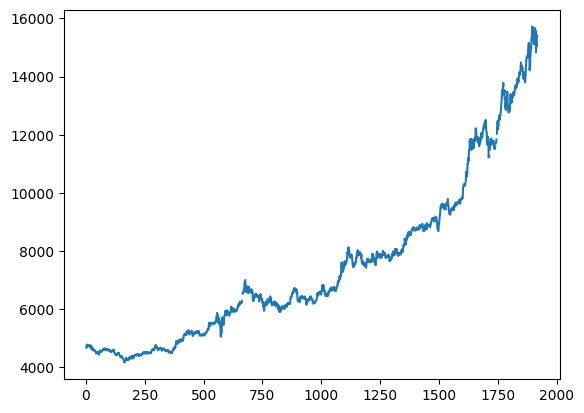

In [15]:
df["JPX_Gold_Mini_Futures_Open"].plot()

In [16]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=3, dropout=0.2):
        super(LSTMModel, self).__init__()
        
        # Multi-layer LSTM with dropout
        self.lstm = nn.LSTM(
            input_dim, 
            hidden_dim, 
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=False  # Set to True for even more complexity
        )
        
        # Batch normalization
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        
        # Multiple fully connected layers with dropout
        self.fc1 = nn.Linear(hidden_dim, hidden_dim * 2)
        self.fc2 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        
        # Activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        """Initialize weights for better training"""
        for name, param in self.named_parameters():
            if 'weight_ih' in name:
                nn.init.xavier_uniform_(param.data)
            elif 'weight_hh' in name:
                nn.init.orthogonal_(param.data)
            elif 'bias' in name:
                param.data.fill_(0)
                
    def forward(self, x):
        # LSTM forward pass
        lstm_out, (h_n, c_n) = self.lstm(x)
        
        # Use last time step output
        last_output = lstm_out[:, -1, :]
        
        # Batch normalization
        normalized = self.batch_norm(last_output)
        
        # Multiple FC layers with dropout and activation
        out = self.fc1(normalized)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        
        out = self.fc3(out)
        
        return out

# Count parameters function
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [17]:
# Use the complex model for better performance
model = LSTMModel(input_dim=1, hidden_dim=128, output_dim=3, num_layers=3, dropout=0.2)

# Use different optimizers and schedulers for complex model
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4, eps=1e-8)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)
criterion = torch.nn.MSELoss()

print(f"Model parameters: {count_parameters(model):,}")
print(f"Model input dim: 1 (log returns)")
print(f"Model output dim: 3 (predict 3 steps ahead)")
print(f"Learning rate: {optimizer.param_groups[0]['lr']}")
print(f"Hidden dim: 128, Layers: 3, Dropout: 0.2")

Model parameters: 397,827
Model input dim: 1 (log returns)
Model output dim: 3 (predict 3 steps ahead)
Learning rate: 0.001
Hidden dim: 128, Layers: 3, Dropout: 0.2


In [18]:
# Create sequences for LSTM training
def create_sequences(data, lookback_sz=60, tgt_len=3):
    sequences = []
    targets = []
    
    for i in range(len(data) - lookback_sz - tgt_len + 1):
        seq = data[i:i+lookback_sz]
        target = data[i+lookback_sz:i+lookback_sz+tgt_len]
        sequences.append(seq)
        targets.append(target)
    
    return torch.FloatTensor(sequences), torch.FloatTensor(targets)

def calculate_log_returns(prices):
    """Calculate log returns: log(price_t / price_{t-1})"""
    import numpy as np
    # Add small epsilon to avoid log(0)
    prices = np.maximum(prices, 1e-8)
    log_returns = np.diff(np.log(prices), axis=0)
    return log_returns

def scale_data(data, scale_factor=1000):
    """Scale data to avoid vanishing gradients"""
    return data * scale_factor

# Get all FX columns
columns = [c for c in df.columns if c[:2] == "FX"]
print(f"Found {len(columns)} FX columns: {columns[:5]}...")  # Show first 5

# Process each FX column and convert to log returns
all_sequences = []
all_targets = []

for col in columns:
    print(f"Processing {col}...")
    
    # Get price data and fill missing values
    price_data = df[col].fillna(method='ffill').fillna(method='bfill').values
    
    # Calculate log returns
    log_returns = calculate_log_returns(price_data.reshape(-1, 1)).flatten()
    
    # Scale log returns to avoid vanishing gradients
    scaled_returns = scale_data(log_returns, scale_factor=1000)
    
    print(f"  Original range: [{log_returns.min():.6f}, {log_returns.max():.6f}]")
    print(f"  Scaled range: [{scaled_returns.min():.6f}, {scaled_returns.max():.6f}]")
    
    # Create sequences for this column
    X_col, y_col = create_sequences(scaled_returns.reshape(-1, 1), lookback_sz=60, tgt_len=3)
    
    if len(X_col) > 0:  # Only add if we have valid sequences
        all_sequences.append(X_col)
        all_targets.append(y_col)

# Combine all sequences
if all_sequences:
    X = torch.cat(all_sequences, dim=0)
    y = torch.cat(all_targets, dim=0)
    
    print(f"Combined sequences - X shape: {X.shape}, y shape: {y.shape}")
    print(f"Final data range - X: [{X.min():.6f}, {X.max():.6f}]")
    print(f"Final data range - y: [{y.min():.6f}, {y.max():.6f}]")
    
    # Create dataset and dataloader
    dataset = TensorDataset(X, y)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    print(f"Dataset size: {len(dataset)}")
    print(f"Input shape: {X.shape}")
    print(f"Target shape: {y.shape}")
else:
    print("No valid sequences created!")

Found 38 FX columns: ['FX_AUDJPY', 'FX_AUDUSD', 'FX_CADJPY', 'FX_CHFJPY', 'FX_EURAUD']...
Processing FX_AUDJPY...
  Original range: [-0.040562, 0.040778]
  Scaled range: [-40.562494, 40.778118]
Processing FX_AUDUSD...
  Original range: [-0.045460, 0.030207]
  Scaled range: [-45.460278, 30.207141]
Processing FX_CADJPY...
  Original range: [-0.038083, 0.038707]
  Scaled range: [-38.082894, 38.707299]


/tmp/ipykernel_5369/3603436433.py:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_data = df[col].fillna(method='ffill').fillna(method='bfill').values
/tmp/ipykernel_5369/3603436433.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.FloatTensor(sequences), torch.FloatTensor(targets)


Processing FX_CHFJPY...
  Original range: [-0.035476, 0.024449]
  Scaled range: [-35.475548, 24.448553]
Processing FX_EURAUD...
  Original range: [-0.032801, 0.037842]
  Scaled range: [-32.800995, 37.841688]
Processing FX_EURGBP...
  Original range: [-0.017885, 0.036943]
  Scaled range: [-17.884706, 36.942609]
Processing FX_EURJPY...
  Original range: [-0.036913, 0.027483]
  Scaled range: [-36.912957, 27.482705]
Processing FX_EURUSD...
  Original range: [-0.028200, 0.027553]
  Scaled range: [-28.200229, 27.552612]
Processing FX_GBPAUD...
  Original range: [-0.027480, 0.029753]
  Scaled range: [-27.479689, 29.753024]
Processing FX_GBPJPY...
  Original range: [-0.037316, 0.030551]
  Scaled range: [-37.315891, 30.551427]
Processing FX_GBPUSD...
  Original range: [-0.041832, 0.030309]
  Scaled range: [-41.831625, 30.309014]
Processing FX_NZDJPY...
  Original range: [-0.074262, 0.082692]
  Scaled range: [-74.261524, 82.692042]
Processing FX_NZDUSD...
  Original range: [-0.069489, 0.077555]


In [19]:
# Check device information
print("=== Device Information ===")

# Check if CUDA is available
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"CUDA device name: {torch.cuda.get_device_name()}")

# Check model device
print(f"\n=== Model Device ===")
model_device = next(model.parameters()).device
print(f"Model is on device: {model_device}")

# Check each parameter's device
print(f"\n=== Parameter Devices ===")
for name, param in model.named_parameters():
    print(f"{name}: {param.device}")

# Show model summary
print(f"\n=== Model Summary ===")
print(model)

=== Device Information ===
CUDA available: True
CUDA device count: 1
Current CUDA device: 0
CUDA device name: NVIDIA GeForce RTX 3050 6GB Laptop GPU

=== Model Device ===
Model is on device: cpu

=== Parameter Devices ===
lstm.weight_ih_l0: cpu
lstm.weight_hh_l0: cpu
lstm.bias_ih_l0: cpu
lstm.bias_hh_l0: cpu
lstm.weight_ih_l1: cpu
lstm.weight_hh_l1: cpu
lstm.bias_ih_l1: cpu
lstm.bias_hh_l1: cpu
lstm.weight_ih_l2: cpu
lstm.weight_hh_l2: cpu
lstm.bias_ih_l2: cpu
lstm.bias_hh_l2: cpu
batch_norm.weight: cpu
batch_norm.bias: cpu
fc1.weight: cpu
fc1.bias: cpu
fc2.weight: cpu
fc2.bias: cpu
fc3.weight: cpu
fc3.bias: cpu

=== Model Summary ===
LSTMModel(
  (lstm): LSTM(1, 128, num_layers=3, batch_first=True, dropout=0.2)
  (batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=3, bias=Tru

In [20]:
# CUDA Setup - Move model and data to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name()}")
    print(f"CUDA memory allocated: {torch.cuda.memory_allocated()/1024**2:.1f} MB")

# Move model to device
model = model.to(device)
print(f"Model moved to: {next(model.parameters()).device}")

# IMPORTANT: Move your data tensors to device too!
if 'X' in locals() and 'y' in locals():
    print("Moving training data to device...")
    X = X.to(device)
    y = y.to(device)
    print(f"X tensor device: {X.device}")
    print(f"y tensor device: {y.device}")
    
    # Recreate dataset and dataloader with GPU tensors
    dataset = TensorDataset(X, y)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
    print("DataLoader recreated with GPU tensors")

# Update optimizer after moving model (important!)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

print("✅ CUDA setup complete!")
print(f"Model parameters on: {next(model.parameters()).device}")
if 'X' in locals():
    print(f"Training data on: {X.device}")

Using device: cuda
CUDA device: NVIDIA GeForce RTX 3050 6GB Laptop GPU
CUDA memory allocated: 0.0 MB
Model moved to: cuda:0
Moving training data to device...
X tensor device: cuda:0
y tensor device: cuda:0
DataLoader recreated with GPU tensors
✅ CUDA setup complete!
Model parameters on: cuda:0
Training data on: cuda:0


In [21]:
# Different ways to move tensors to CUDA
print("=== CUDA Tensor Operations ===")

# Method 1: Using .to(device)
sample_tensor = torch.randn(3, 4)
print(f"Original tensor device: {sample_tensor.device}")

cuda_tensor1 = sample_tensor.to(device)
print(f"Method 1 - .to(device): {cuda_tensor1.device}")

# Method 2: Using .cuda() (only works if CUDA available)
if torch.cuda.is_available():
    cuda_tensor2 = sample_tensor.cuda()
    print(f"Method 2 - .cuda(): {cuda_tensor2.device}")

# Method 3: Create tensor directly on device
cuda_tensor3 = torch.randn(3, 4, device=device)
print(f"Method 3 - direct creation: {cuda_tensor3.device}")

# Check memory usage
if torch.cuda.is_available():
    print(f"\nCUDA Memory:")
    print(f"Allocated: {torch.cuda.memory_allocated()/1024**2:.1f} MB")
    print(f"Reserved: {torch.cuda.memory_reserved()/1024**2:.1f} MB")

=== CUDA Tensor Operations ===
Original tensor device: cpu
Method 1 - .to(device): cuda:0
Method 2 - .cuda(): cuda:0
Method 3 - direct creation: cuda:0

CUDA Memory:
Allocated: 18.5 MB
Reserved: 22.0 MB


In [22]:
def train_cuda(model, train_loader, optimizer, criterion, scheduler, num_epochs, device):
    model.train()
    
    print(f"Starting training on {device}")
    
    for epoch in range(num_epochs):
        total_loss = 0
        num_batches = 0
        
        for batch_x, batch_y in train_loader:
            # Data should already be on device, but ensure it is
            if batch_x.device != device:
                batch_x = batch_x.to(device)
                batch_y = batch_y.to(device)
            
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y.squeeze(-1))
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
            
            # Print first batch info
            if num_batches == 1:
                print(f"  Epoch {epoch+1} - First batch loss: {loss.item():.8f}")
                print(f"  Batch X device: {batch_x.device}, Model device: {next(model.parameters()).device}")
        
        avg_loss = total_loss / num_batches
        print(f"Epoch [{epoch+1}/{num_epochs}], Avg Loss: {avg_loss:.8f}, LR: {optimizer.param_groups[0]['lr']:.6f}")
        
        # Step scheduler
        scheduler.step(avg_loss)
        
        # Monitor GPU memory every 5 epochs
        if torch.cuda.is_available() and (epoch + 1) % 5 == 0:
            print(f"  GPU Memory: {torch.cuda.memory_allocated()/1024**2:.1f} MB allocated")

# Run training with CUDA
print("🚀 Starting CUDA Training...")
train_cuda(model, train_loader, optimizer, criterion, scheduler, num_epochs=20, device=device)

🚀 Starting CUDA Training...
Starting training on cuda
  Epoch 1 - First batch loss: 36.47387695
  Batch X device: cuda:0, Model device: cuda:0
Epoch [1/20], Avg Loss: 41.86199417, LR: 0.001000
  Epoch 2 - First batch loss: 40.93861389
  Batch X device: cuda:0, Model device: cuda:0
Epoch [2/20], Avg Loss: 41.81582677, LR: 0.001000
  Epoch 3 - First batch loss: 36.60321426
  Batch X device: cuda:0, Model device: cuda:0
Epoch [3/20], Avg Loss: 41.82050728, LR: 0.001000
  Epoch 4 - First batch loss: 37.45718765
  Batch X device: cuda:0, Model device: cuda:0
Epoch [4/20], Avg Loss: 41.81205951, LR: 0.001000
  Epoch 5 - First batch loss: 38.83466721
  Batch X device: cuda:0, Model device: cuda:0
Epoch [5/20], Avg Loss: 41.81930779, LR: 0.001000
  GPU Memory: 40.0 MB allocated
  Epoch 6 - First batch loss: 48.16466522
  Batch X device: cuda:0, Model device: cuda:0
Epoch [6/20], Avg Loss: 41.79950815, LR: 0.001000
  Epoch 7 - First batch loss: 25.84155083
  Batch X device: cuda:0, Model device

In [26]:
for batch_x, batch_y in train_loader:
    out = model(batch_x)

    print(out[0])
    print(batch_y[0])

    break

tensor([ 0.9131, -0.1690,  0.4363], device='cuda:0', grad_fn=<SelectBackward0>)
tensor([[ 9.8738],
        [ 4.5901],
        [-4.0155]], device='cuda:0')


In [19]:
# CUDA Version Compatibility Check
print("=== CUDA COMPATIBILITY DIAGNOSTICS ===\n")

import torch
import subprocess
import sys

# 1. PyTorch CUDA Information
print("1. PyTorch CUDA Information:")
print(f"   PyTorch version: {torch.__version__}")
print(f"   PyTorch CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   PyTorch CUDA version: {torch.version.cuda}")
    print(f"   PyTorch cuDNN version: {torch.backends.cudnn.version()}")
    print(f"   Number of GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"   GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("   ❌ PyTorch was compiled without CUDA support")

print("\n" + "="*50)

# 2. System CUDA Information
print("2. System CUDA Installation:")
try:
    # Check nvidia-smi
    result = subprocess.run(['nvidia-smi', '--query-gpu=driver_version,cuda_version', '--format=csv,noheader,nounits'], 
                          capture_output=True, text=True, timeout=10)
    if result.returncode == 0:
        lines = result.stdout.strip().split('\n')
        for i, line in enumerate(lines):
            driver_ver, cuda_ver = line.split(', ')
            print(f"   GPU {i} - Driver: {driver_ver}, CUDA: {cuda_ver}")
    else:
        print("   ❌ nvidia-smi command failed")
except Exception as e:
    print(f"   ❌ Could not run nvidia-smi: {e}")

try:
    # Check nvcc version
    result = subprocess.run(['nvcc', '--version'], capture_output=True, text=True, timeout=10)
    if result.returncode == 0:
        output = result.stdout
        for line in output.split('\n'):
            if 'release' in line.lower():
                print(f"   NVCC: {line.strip()}")
    else:
        print("   ❌ nvcc not found or failed")
except Exception as e:
    print(f"   ❌ Could not run nvcc: {e}")

print("\n" + "="*50)

# 3. Compatibility Analysis
print("3. Compatibility Analysis:")
if torch.cuda.is_available():
    torch_cuda = torch.version.cuda
    print(f"   PyTorch compiled with CUDA: {torch_cuda}")
    
    # Test basic CUDA operations
    try:
        test_tensor = torch.tensor([1.0, 2.0, 3.0]).cuda()
        result = test_tensor * 2
        print("   ✅ Basic CUDA operations work")
        
        # Test GPU memory
        print(f"   GPU Memory - Total: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
        print(f"   GPU Memory - Available: {(torch.cuda.get_device_properties(0).total_memory - torch.cuda.memory_allocated()) / 1024**3:.1f} GB")
        
    except Exception as e:
        print(f"   ❌ CUDA operations failed: {e}")
        print("   This suggests a compatibility issue!")
        
else:
    print("   ❌ PyTorch CUDA not available")

print("\n" + "="*50)

# 4. Troubleshooting Recommendations
print("4. Troubleshooting Tips:")
if not torch.cuda.is_available():
    print("   • Install PyTorch with CUDA support:")
    print("     pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118")
    print("   • Check if your GPU supports CUDA")
    print("   • Verify NVIDIA drivers are installed")
else:
    print("   ✅ PyTorch CUDA appears to be working")
    print("   • If you get 'device busy' errors, try:")
    print("     - Restart the Python kernel")
    print("     - torch.cuda.empty_cache()")
    print("     - Reduce batch size")
    print("     - Check for other processes using GPU")

=== CUDA COMPATIBILITY DIAGNOSTICS ===

1. PyTorch CUDA Information:
   PyTorch version: 2.8.0+cu128
   PyTorch CUDA available: True
   PyTorch CUDA version: 12.8
   PyTorch cuDNN version: 91002
   Number of GPUs: 1
   GPU 0: NVIDIA GeForce RTX 3050 6GB Laptop GPU

2. System CUDA Installation:
   ❌ nvidia-smi command failed
   NVCC: Cuda compilation tools, release 12.0, V12.0.140

3. Compatibility Analysis:
   PyTorch compiled with CUDA: 12.8
   ❌ CUDA operations failed: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.

   This suggests a compatibility issue!

4. Troubleshooting Tips:
   ✅ PyTorch CUDA appears to be working
   • If you get 'device busy' errors, try:
     - Restart the Python kernel
     - torch.cuda.empty_cache()
     

In [25]:
# CUDA Memory Management and Cleanup
print("=== CUDA MEMORY CLEANUP ===")

def clear_cuda_memory():
    """Clear CUDA cache and reset GPU memory"""
    if torch.cuda.is_available():
        print("Clearing CUDA cache...")
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        print(f"Memory after cleanup: {torch.cuda.memory_allocated()/1024**2:.1f} MB allocated")
        print(f"Memory reserved: {torch.cuda.memory_reserved()/1024**2:.1f} MB")
    else:
        print("CUDA not available")

def check_gpu_processes():
    """Check what processes are using the GPU"""
    try:
        result = subprocess.run(['nvidia-smi', 'pmon', '-c', '1'], 
                              capture_output=True, text=True, timeout=5)
        if result.returncode == 0:
            print("GPU Process Monitor:")
            print(result.stdout)
        else:
            print("Could not check GPU processes")
    except Exception as e:
        print(f"Error checking GPU processes: {e}")

def safe_cuda_setup():
    """Safely set up CUDA with error handling"""
    try:
        # Clear any existing CUDA memory
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            
        # Set device
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"Selected device: {device}")
        
        if device.type == 'cuda':
            print(f"GPU: {torch.cuda.get_device_name()}")
            print(f"Memory available: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
            
        return device
        
    except Exception as e:
        print(f"CUDA setup failed: {e}")
        print("Falling back to CPU")
        return torch.device('cpu')

# Run cleanup and setup
clear_cuda_memory()
print("\n" + "="*40)
check_gpu_processes()
print("\n" + "="*40)
device = safe_cuda_setup()

=== CUDA MEMORY CLEANUP ===
Clearing CUDA cache...


AcceleratorError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [3]:
import torch
print("Torch CUDA version:", torch.version.cuda)

Torch CUDA version: 12.4


In [1]:
# Fix CUDA "Device Busy" Error
print("=== FIXING CUDA DEVICE BUSY ERROR ===")

def fix_cuda_busy_error():
    """Comprehensive fix for CUDA device busy errors"""
    
    print("1. Checking current GPU usage...")
    try:
        result = subprocess.run(['nvidia-smi', '--query-gpu=memory.used,memory.total,utilization.gpu', 
                               '--format=csv,noheader,nounits'], 
                              capture_output=True, text=True, timeout=5)
        if result.returncode == 0:
            mem_used, mem_total, gpu_util = result.stdout.strip().split(', ')
            print(f"   GPU Memory: {mem_used}MB / {mem_total}MB ({float(mem_used)/float(mem_total)*100:.1f}%)")
            print(f"   GPU Utilization: {gpu_util}%")
        else:
            print("   Could not get GPU usage info")
    except Exception as e:
        print(f"   Error: {e}")
    
    print("\n2. Attempting fixes...")
    
    # Fix 1: Clear Python variables holding CUDA tensors
    print("   • Clearing Python CUDA variables...")
    import gc
    for obj in gc.get_objects():
        if torch.is_tensor(obj) and obj.is_cuda:
            del obj
    gc.collect()
    
    # Fix 2: Clear CUDA cache
    print("   • Clearing CUDA cache...")
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        
    # Fix 3: Reset CUDA context
    print("   • Resetting CUDA context...")
    try:
        if torch.cuda.is_available():
            torch.cuda.reset_peak_memory_stats()
            torch.cuda.synchronize()
    except Exception as e:
        print(f"     Warning: {e}")
    
    # Fix 4: Check for zombie processes
    print("   • Checking for zombie GPU processes...")
    try:
        result = subprocess.run(['fuser', '-v', '/dev/nvidia*'], 
                              capture_output=True, text=True, timeout=5)
        if result.returncode == 0 and result.stdout.strip():
            print("     Found processes using GPU:")
            print(result.stdout)
        else:
            print("     No zombie processes found")
    except Exception:
        print("     Could not check for zombie processes")
    
    print("\n3. Testing CUDA after fixes...")
    try:
        if torch.cuda.is_available():
            # Test with small tensor
            test = torch.tensor([1.0]).cuda()
            result = test * 2
            print("   ✅ CUDA test successful!")
            del test, result
            torch.cuda.empty_cache()
        else:
            print("   ❌ CUDA not available")
    except Exception as e:
        print(f"   ❌ CUDA test failed: {e}")
        print("   Consider restarting the Python kernel or system")

# Run the fix
fix_cuda_busy_error()

=== FIXING CUDA DEVICE BUSY ERROR ===
1. Checking current GPU usage...
   Error: name 'subprocess' is not defined

2. Attempting fixes...
   • Clearing Python CUDA variables...


NameError: name 'torch' is not defined